In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from community import community_louvain

In [ ]:
def undirected(year):
    G=nx.Graph()
    df=pd.read_csv(f"graphs/{year}.csv")
    for index, row in df.iterrows():
        source=row["source"]
        target=row["target"]
        weight=float(row[f"{year}"])
        if G.has_edge(row["source"],row["target"]):
            G[source][target]['weight']+=weight
        else:

            G.add_edge(source,target,weight=weight)

    return G



In [ ]:
def degree_dist(year):
    G=undirected(year)
    degree_sequence = [sum(weight for _, _, weight in G.edges(node, data='weight')) for node in G.nodes()]
    bin_edges = np.arange(0, max(degree_sequence) + 100001, 10000)
    # Plot degree distribution
    plt.figure(figsize=(10,5))
    plt.hist(degree_sequence,bins=bin_edges, alpha=1,color='navy')
    plt.xlabel('Degree (Trillion US$)')
    plt.ylabel('Frequency')
    plt.title(f'Degree Distribution {year}')
    
    plt.savefig(f"Degree_dist/{year}")

In [ ]:
G=undirected(2019)
i=G.edges(data='weight')
for weight in i:
    print(weight[2])

In [40]:
def avg_degree(year):
    G=undirected(year)
    total_degree = sum(weight for _, _, weight in G.edges(data='weight'))
    num_nodes = G.number_of_nodes()
    average_degree = total_degree / num_nodes

    return average_degree

    



In [46]:
def avg_cluster(year):
    G=undirected(year)
    return nx.average_clustering(G,weight='weight')
    

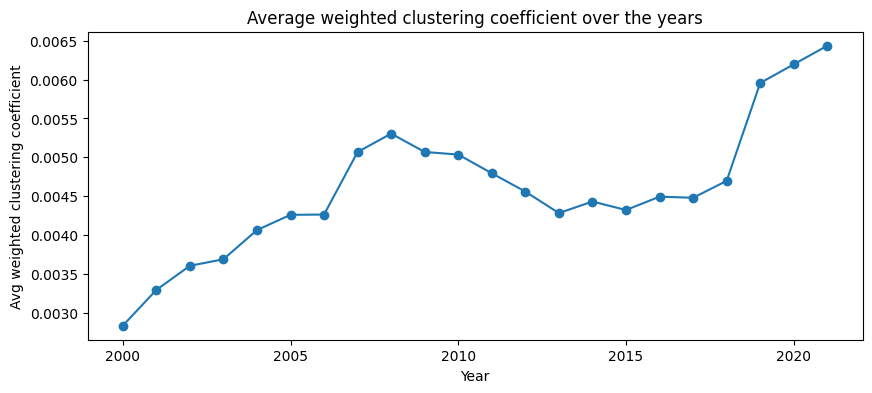

In [49]:
x=[]
y=[]
for i in range(2000,2022):
    x.append(i)
    y.append(avg_cluster(i))
plt.figure(figsize=(10,4))
plt.plot(x,y,marker='o')
plt.xlabel("Year")
plt.ylabel("Avg weighted clustering coefficient")
plt.title("Average weighted clustering coefficient over the years")
plt.savefig("Degree_dist/avg_cluster_plot")


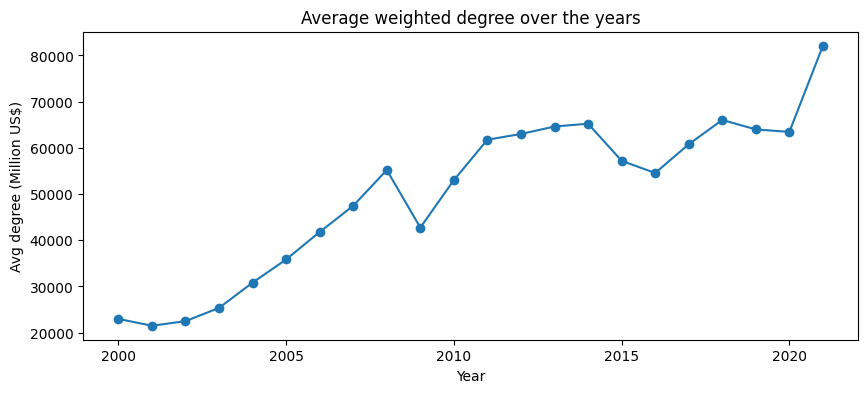

In [48]:
x=[]
y=[]
for i in range(2000,2022):
    x.append(i)
    y.append(avg_degree(i))
plt.figure(figsize=(10,4))
plt.plot(x,y,marker='o')
plt.xlabel("Year")
plt.ylabel("Avg degree (Million US$)")
plt.title("Average weighted degree over the years")
plt.savefig("Degree_dist/avg_deg_plot")


In [ ]:
for i in [2000,2005,2010,2015,2020]:
    degree_dist(i)